<h1 style="font-size: 70px;text-align: center; font-family:Copperplate; color: darkblue">Fake News Detection</h1>


<!-- # EDA -->
<div id = "eda" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>1.EDA</b>
    </h1>

</div>

In [29]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

<div id = "rd"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.1 Reading Data
    </h3>

</div>

In [30]:
df = pd.read_csv('/kaggle/input/fake-news-classification/WELFake_Dataset.csv')
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [31]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [33]:
y = df.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


real    0.514404
fake    0.485596
Name: label, dtype: float64

In [34]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

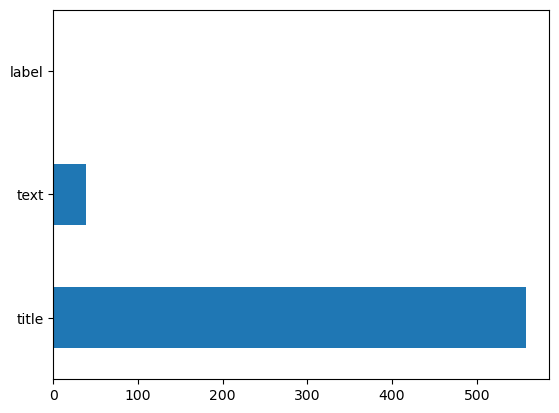

In [35]:
df.isnull().sum().plot(kind="barh")
plt.show()

<div style = "height: 210px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Observations:</b> 
        
 <p>
     <ol>
         <li>There are a total of 4 columns and 72134 rows in the data</li>
         <li>Label is the target variable</li>
         <li>Percentage of Real and fake News articles:<ul><li>real : 51%</li><li>fake :49%</li></ul></li>
         <li>Missing values are present in the dataset</li>
    </ol>
 </p>
    </h3>

</div>

In [36]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [37]:
df = df.fillna('')

In [38]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [39]:
df.nunique()

title    62348
text     62719
label        2
dtype: int64

In [40]:
df["title_text"] = df["title"] + df["text"]
df["body_len"] = df["title_text"].apply(lambda x: len(x) - x.count(" "))
df.head()

,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668


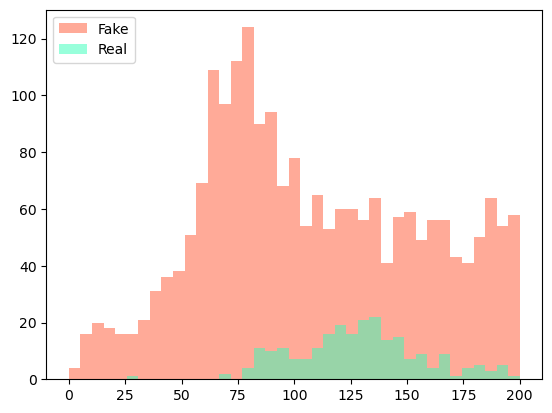

In [41]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(df[df["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

<div style = "height: 150px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="padding: 10px;
              color:black;
               ">
        <b>Insights :</b> 
        <br></br>
       
 <i>Fake news seem to be quite a bit longer than real news.</i>
    </h3>

</div>

Text(0.5, 1.0, 'Distribution of Fake/Real News')

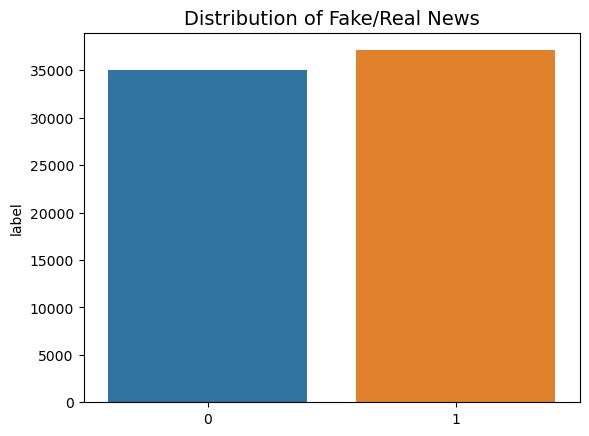

In [42]:
class_names = ['fake', 'real'] 
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

In [43]:

y.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

<div id = "nt"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.2 Data Visualization of all News Titles
    </h3>

</div>

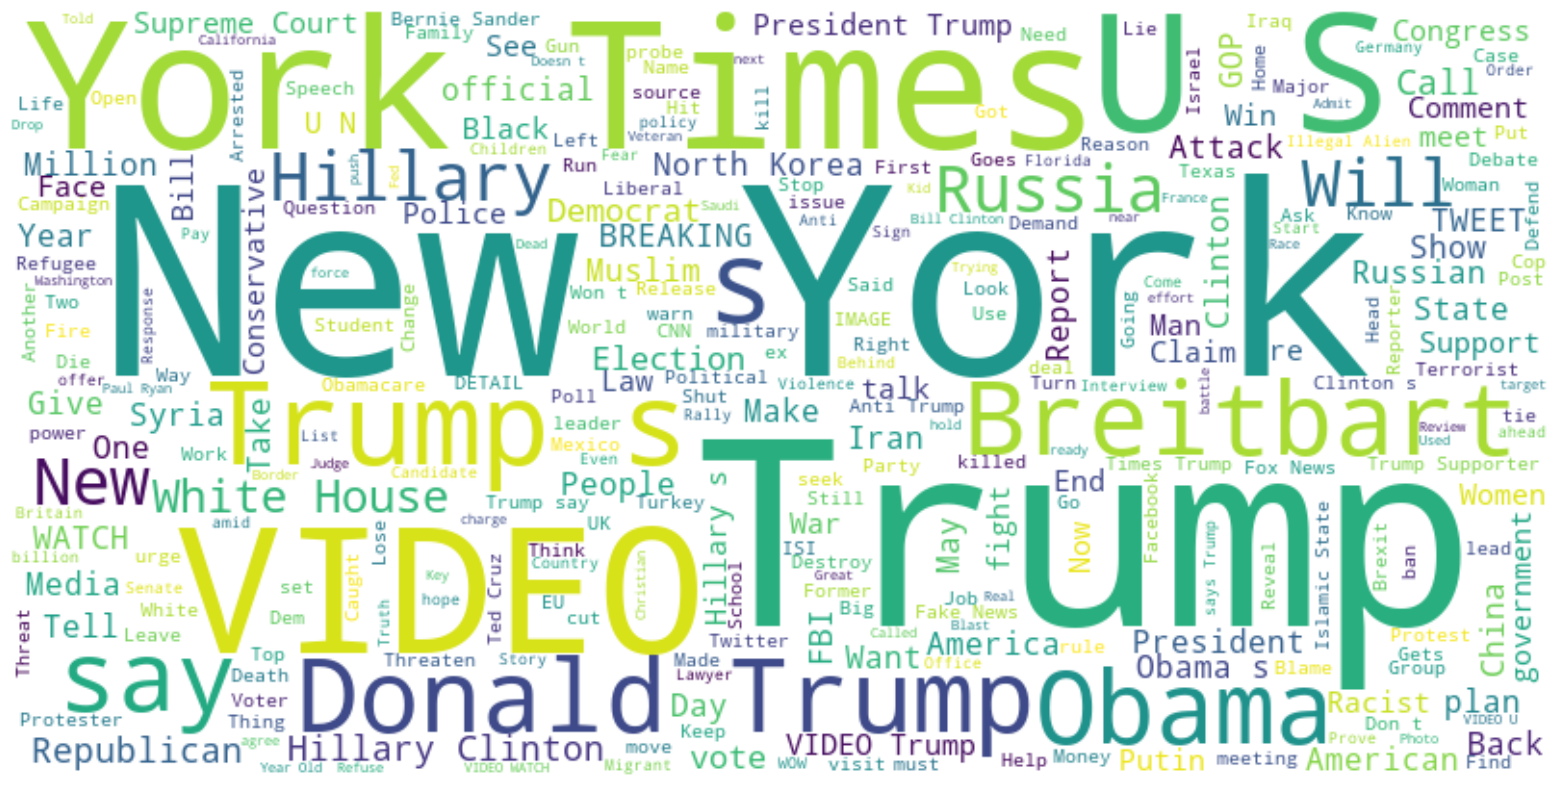

In [45]:

titles = ' '.join(title for title in df['title'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div style = "height: 110px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Quick Insights:</b> 
        
 <p>
     <ul>
         <li>many of available news articles are about elections and presidents of USA </li>
    </ul>
 </p>
    </h3>

</div>

<div id = "ft"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.3 Data Visualization of texts in fake news
    </h3>

</div>

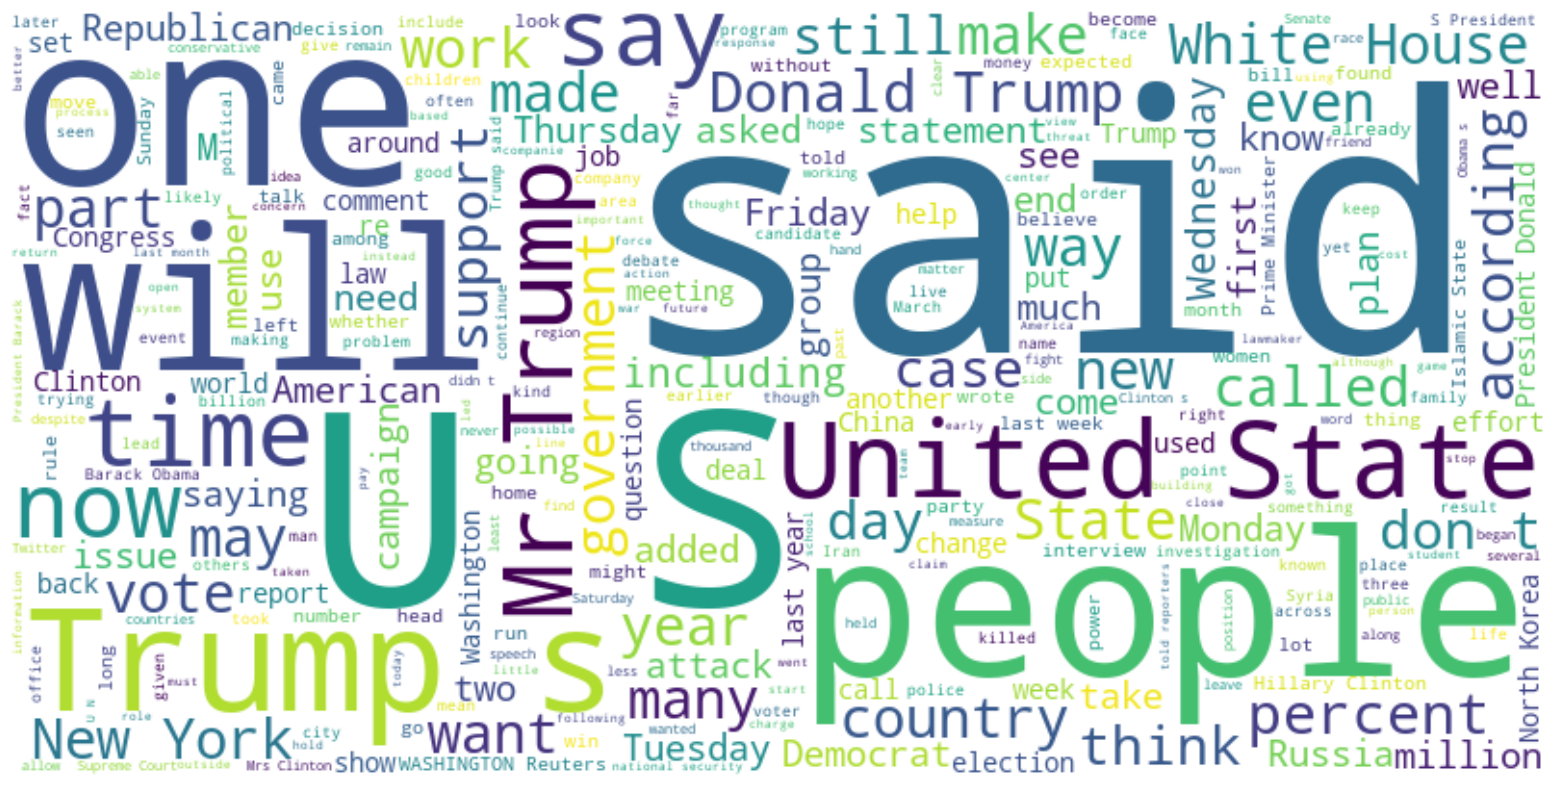

In [46]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div id = "rt"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.4 Data Visualization of texts in Real news
    </h3>

</div>

<function matplotlib.pyplot.show(close=None, block=None)>

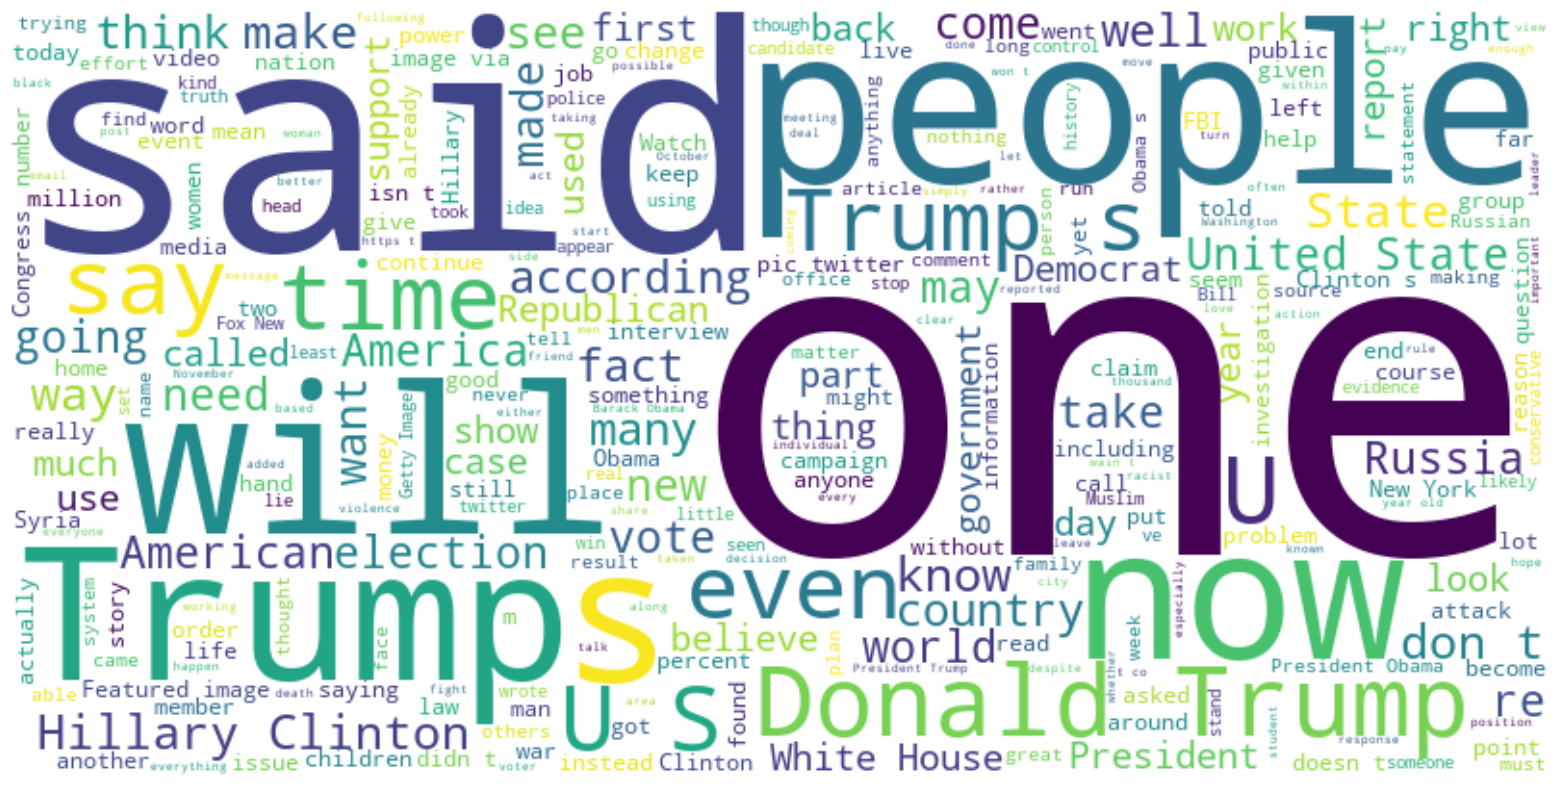

In [47]:
real_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(real_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<!-- # EDA -->
<div id = "bm"style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>2.Bag of Words Model</b>
    </h1>

</div>

In [48]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)


<!-- # EDA -->
<div id = "nb"style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>3.Training Naive Bayes Model</b>
    </h1>

</div>

In [49]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)


MultinomialNB()

<div id = "p1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.1 Predictions on NB model 
    </h3>

</div>

In [50]:
pred = nb_classifier.predict(count_test)

<div id = "e1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.2 Evaluation of NB predictions
    </h3>

</div>

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11640
           1       0.91      0.87      0.89     12165

    accuracy                           0.89     23805
   macro avg       0.89      0.89      0.89     23805
weighted avg       0.89      0.89      0.89     23805



<div style = "height: 65px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               text-align: center;
               ">
        <i><b>Accuracy achieved using Naive Bayes Model : 89%</b></i>
    </h3>

</div>

<div id = "cm1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.3 Confusion Matrix
    </h3>

</div>

Text(70.72222222222221, 0.5, 'Real Labels')

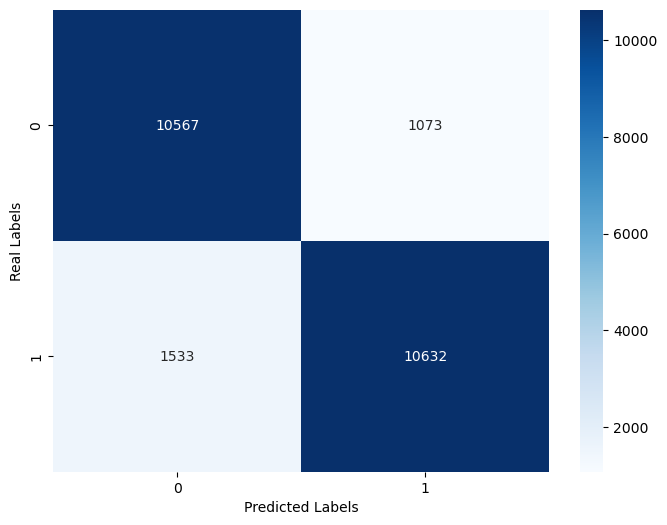

In [52]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

<!-- # EDA -->
<div id = "rm" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>4.Training Random Forest Model</b>
    </h1>

</div>

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(count_train, y_train)


RandomForestClassifier(n_estimators=300)

<div id = "p2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.1 Predictions on Random Forest Classifier
    </h3>

</div>

In [54]:
pred2 = model.predict(count_test)

<div id = "e2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.2 Evaluation of RF Classifier Predictions
    </h3>

</div>

In [55]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11640
           1       0.93      0.94      0.93     12165

    accuracy                           0.93     23805
   macro avg       0.93      0.93      0.93     23805
weighted avg       0.93      0.93      0.93     23805



<div style = "height: 65px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               text-align: center;
               ">
        <i><b>Accuracy achieved using Random Forest Model : 94%</b></i>
    </h3>

</div>

<div id = "cm2" style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.3 Confusion Matrix
    </h3>

</div>

Text(70.72222222222221, 0.5, 'Real Labels')

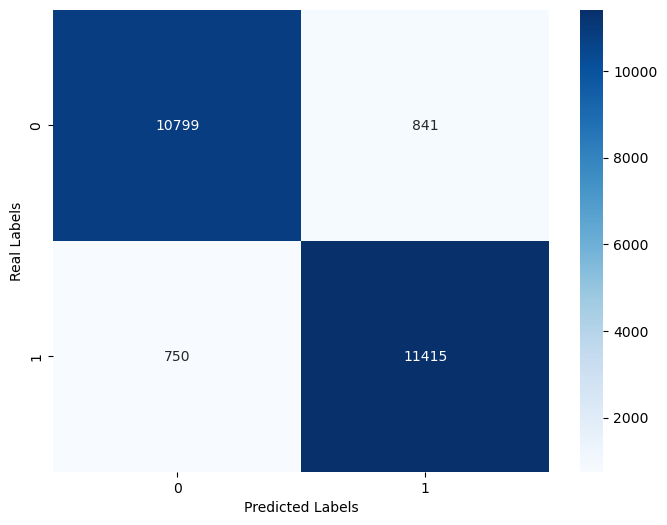

In [56]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred2), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')